<a href="https://colab.research.google.com/github/FGalvao77/others-knowledge-in-python-for-data-science/blob/main/O_que_s%C3%A3o_Pipelines_e_para_que_serve_isso_(Automatize_suas_etapas_de_Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O que são Pipelines e para que serve isso (Automatize suas etapas de Machine Learning)**

- https://minerandodados.com.br/o-que-sao-pipelines-e-para-que-serve-isso-automatize-suas-etapas-de-machine-learning/

Vamos ver quais são as etapas de um projeto de machine learning e como podemos otimizar essas etapas.

## **Fluxo de Processos de Machine Learning**

- Pipelines permitem automatizar os fluxos de processos em seus projetos de machine learning.

- Reduzimos a quantidade de código.

- Menos risco de erros.

In [ ]:
# instale o category_encoders
!pip install category_encoders

     |████████████████████████████████| 81kB 6.9MB/s 


In [ ]:
# importando as bibliotecas necessárias
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree
import pandas as pd

## **1° Etapa: Obtendo os dados.**

Esse é um dataset bem famoso disponível em https://archive.ics.uci.edu/ml/datasets/Adult, onde a tarefa é prever se uma pessoa recebe > 50K ou <= 50K ao ano com base em algumas características.

In [ ]:
# realizando o carregamento do conjunto de dados para google colab
from google.colab import files  # biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving adult.data to adult.data


In [ ]:
# lendo o dataset
df = pd.read_csv('adult.data')

In [ ]:
# visualizando alguns dados
df.head().T

,0,1,2,3,4
39,50,38,53,28,37
State-gov,Self-emp-not-inc,Private,Private,Private,Private
77516,83311,215646,234721,338409,284582
Bachelors,Bachelors,HS-grad,11th,Bachelors,Masters
13,13,9,7,13,14
Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial
Not-in-family,Husband,Not-in-family,Husband,Wife,Wife
White,White,White,Black,Black,White
Male,Male,Male,Male,Female,Female


**O arquivo não possui o `header` - nome das colunas.**


In [ ]:
# visualizando as colunas presente 
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [ ]:
# visualizando os índices
df.index

RangeIndex(start=0, stop=32560, step=1)

**Devido à falta dos nomes das colunas, irei instanciar manualmente para pode prosseguir na atividade prática**

`Os nomes peguei do próprio site do Minerando Dados`


In [ ]:
# instanciando manualmente os nomes das colunas
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'matital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income']

In [ ]:
# verificando se os nomes instanciados e igual a quantidade de colunas no df
print(len(headers))
print(len(df.columns))

15
15


In [ ]:
print([len(headers)] == [len(df.columns)])

True


In [ ]:
# lendo novamente o dataset e agregando seus headers
df = pd.read_csv('adult.data', names=headers)

In [ ]:
# verificando se os nomes das colunas foram agregados
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'matital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=32561, step=1)

In [ ]:
# verificando a quantidade de linhas e colunas
df.shape

(32561, 15)

## **2° Etapa: Limpeza, Preparação e Manipulação dos dados.**

In [ ]:
# removendo as colunas desnecessárias
df.drop(['education'], axis =1, inplace=True)

Precisamos remover essa coluna, pois ela é redundante (possui a mesma informação) com a coluna education-num.

Como os modelos de machine learning não aceitam dados categóricos, a prioridade é manter a coluna que tem o tipo de dados int ou float.

In [ ]:
# separa dados e classes
X = df.drop('income', axis=1, inplace=False)
y = df.income

In [ ]:
# visualizando as features
X.head()

,age,workclass,fnlwgt,education-num,matital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
# visualizando as classes
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

No X temos as variáveis que representam as características das pessoas, e na variável y temos a classe que queremos prever.

In [ ]:
# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

Vamos separar as colunas onde os dados são categóricos, pois essas colunas precisam de um tratamento especial.

In [ ]:
# selecionar as colunas não numéricas
df.select_dtypes(include='object')

,workclass,matital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


Como já foi dito os modelos de machine learning não trabalham com dados categóricos, então precisamos transformar esses dados para entregar para o algoritmo. É o que faremos a seguir:

## **Aplicando One Hot Encoder**

É uma técnica que vai gerar vetores binários para cada categoria.

Exemplo:

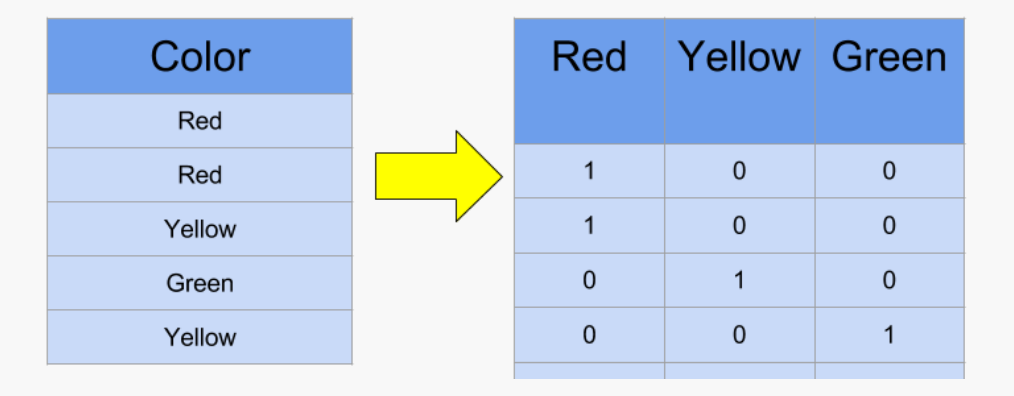

Depois de aplicar o one hot encoder teremos um novo DataFrame onde cada valor único da tabela Color vira uma coluna, se temos uma cor red essa coluna será representada com o valor 1 e as demais com o valor 0 e assim sucessivamente.

In [ ]:
ohe = OneHotEncoder(use_cat_names=True)

In [ ]:
X_train = ohe.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# resultado do one hot encoder
X_train.head()

,age,workclass_ Private,workclass_ Federal-gov,workclass_ Self-emp-not-inc,workclass_ Local-gov,workclass_ ?,workclass_ Self-emp-inc,workclass_ State-gov,workclass_ Without-pay,workclass_ Never-worked,fnlwgt,education-num,matital-status_ Married-civ-spouse,matital-status_ Never-married,matital-status_ Divorced,matital-status_ Married-spouse-absent,matital-status_ Separated,matital-status_ Widowed,matital-status_ Married-AF-spouse,occupation_ Exec-managerial,occupation_ Handlers-cleaners,occupation_ Craft-repair,occupation_ Adm-clerical,occupation_ Farming-fishing,occupation_ Prof-specialty,occupation_ ?,occupation_ Machine-op-inspct,occupation_ Protective-serv,occupation_ Tech-support,occupation_ Transport-moving,occupation_ Sales,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Armed-Forces,relationship_ Wife,relationship_ Own-child,relationship_ Not-in-family,relationship_ Husband,relationship_ Unmarried,relationship_ Other-relative,...,native-country_ Mexico,native-country_ England,native-country_ Philippines,native-country_ Dominican-Republic,native-country_ Vietnam,native-country_ Peru,native-country_ ?,native-country_ China,native-country_ India,native-country_ Cuba,native-country_ Canada,native-country_ Japan,native-country_ El-Salvador,native-country_ Taiwan,native-country_ Germany,native-country_ Hong,native-country_ Iran,native-country_ Columbia,native-country_ Puerto-Rico,native-country_ Guatemala,native-country_ Hungary,native-country_ South,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Jamaica,native-country_ Ecuador,native-country_ Portugal,native-country_ Haiti,native-country_ Poland,native-country_ Greece,native-country_ Nicaragua,native-country_ Honduras,native-country_ Thailand,native-country_ Ireland,native-country_ Trinadad&Tobago,native-country_ Yugoslavia,native-country_ Cambodia,native-country_ Italy,native-country_ Laos,native-country_ Scotland,native-country_ France
19809,35,1,0,0,0,0,0,0,0,0,187089,11,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19190,17,1,0,0,0,0,0,0,0,0,29571,8,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14185,28,1,0,0,0,0,0,0,0,0,81540,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19120,49,1,0,0,0,0,0,0,0,0,54772,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29599,42,0,1,0,0,0,0,0,0,0,557644,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


O use_cat_names=True coloca o nome de cada categoria no inicio de cada coluna.

## **Aplicando um pré-processador**

O StandardScaler executa a tarefa de padronização, ou seja, transforma todas as features para que elas fiquem em uma mesma escala. Cada coluna vai ter média igual a 0 e desvio padrão igual a 1.

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
StandardScaler(copy=True,
               with_mean=True, with_std=True )

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
valores_scalados = scaler.transform(X_train)

In [ ]:
# visualizando os valores escalados da primeira linha
valores_scalados[:1]

array([[-0.26458067,  0.66161861, -0.17266983, -0.29335537, -0.26042478,
        -0.24501808, -0.1910564 , -0.20479802, -0.0192012 , -0.01693318,
        -0.02146531,  0.35430986,  1.07983599, -0.69832924, -0.3961153 ,
        -0.11339195, -0.17714589, -0.17983294, -0.0212286 ,  2.64007081,
        -0.20674398, -0.3819517 , -0.36284401, -0.17653019, -0.38068368,
        -0.2456747 , -0.2541829 , -0.14204917, -0.17204004, -0.22653339,
        -0.35543187, -0.33545264, -0.06787884, -0.01567675,  4.44383433,
        -0.42988863, -0.58296156, -0.82747741, -0.34347969, -0.17653019,
         0.41440174, -0.08878691, -0.32769277, -0.09878521, -0.18212562,
         1.42919961, -1.42919961, -0.14726406, -0.2173285 ,  0.12093292,
         0.34011737, -0.14234891, -0.05284296, -0.0809551 , -0.04751143,
        -0.04663768, -0.03136507, -0.13467121, -0.04751143, -0.05733036,
        -0.05399936, -0.05839902, -0.04344257, -0.05768875, -0.03788547,
        -0.06508241, -0.02395056, -0.03678559, -0.0

In [ ]:
# aplicando o StanderScaler nos dados de treino
X_train = scaler.transform(X_train)

## **3° Etapa: Treino do modelo.**

Vamos usar o modelo de árvore de decisão. Temos um artigo completo no nosso blog falando desse algoritmo.

In [ ]:
clf_tree = tree.DecisionTreeClassifier()

In [ ]:
# passando para o modelo os dados de treino 
clf_tree = clf_tree.fit(X_train, y_train)

É necessário aplicar todos os métodos acima para os dados de teste, garantindo que eles estejam no mesmo formato do dados de treino, caso contrário o modelo não será capaz de prever novos resultados ou essa previsão será muito ruim.

**Aplica OHE e o Pré-processador nos dados de teste**

In [ ]:
X_test = ohe.transform(X_test)
scaler_test = StandardScaler().fit(X_test)
X_test = scaler_test.transform(X_test)

In [ ]:
X_test

array([[-0.55206236, -1.53303808,  5.58371432, ..., -0.02715794,
        -0.02217164, -0.02933573],
       [ 1.59049174,  0.65229952, -0.17909226, ..., -0.02715794,
        -0.02217164, -0.02933573],
       [-0.69982472,  0.65229952, -0.17909226, ..., -0.02715794,
        -0.02217164, -0.02933573],
       ...,
       [ 1.95989762, -1.53303808, -0.17909226, ..., -0.02715794,
        -0.02217164, -0.02933573],
       [ 1.36884821, -1.53303808, -0.17909226, ..., -0.02715794,
        -0.02217164, -0.02933573],
       [ 0.1867494 ,  0.65229952, -0.17909226, ..., -0.02715794,
        -0.02217164, -0.02933573]])

In [ ]:
# realizando as previsões
clf_tree.predict(X_test)

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## **4°Etapa: Validação do modelo.**

In [ ]:
acuracia = clf_tree.score(X_test, y_test)
acuracia

0.8151332760103182

## **5°Etapa: Nessa etapa é feita a melhora do modelo, geralmente você vai fazer melhorias nas etapas anteriores, repetindo esse ciclo quantas vezes for necessário.**

**Criando Pipelines**

- Encadeia etapas em sequencia.

- Aplicação das etapas em dados de treino e teste

In [ ]:
pip_1 = Pipeline([
                  ('ohe', OneHotEncoder()),
                  ('scaler', StandardScaler()),
                  ('clf', tree.DecisionTreeClassifier())
])

In [ ]:
pip_1.steps

[('ohe', OneHotEncoder(cols=None, drop_invariant=False, handle_missing='value',
                handle_unknown='value', return_df=True, use_cat_names=False,
                verbose=0)),
 ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'))]

Perceba que nesse único processo executamos o one hot encoder, o standardscaler e treinamos o modelo.

**Fluxo de processos com Pipeline**

Agora vamos separar os dados de treino e teste e depois vamos aplicar o pipeline criado acima. Observe como tudo fica bem mais simples.

In [ ]:
X_train, X_test, Y_train, y_test = train_test_split(X, y)

In [ ]:
pip_1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['workclass', 'matital-status',
                                     'occupation', 'relationship', 'race',
                                     'sex', 'native-country'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samp

**Validação do modelo**

In [ ]:
acuracia = pip_1.score(X_test, y_test)
acuracia

0.6265815010440978

**Criando outros Pipelines**

- Crie pipelines com configurações distintas.

- Valide vários modelos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# pipeline com o pré-processador MinMaxScaler
pip_minmax =  Pipeline([
                        ('ohe', OneHotEncoder()),
                        ('min_max_scaler', MinMaxScaler()),
                        ('clf', tree.DecisionTreeClassifier())
])

In [ ]:
# pipeline com o pré-processador MinMaxScaler
# e definindo um parâmetro para o modelo
pip_max_depth = Pipeline([
                          ('ohe', OneHotEncoder()),
                          ('min_max_scaler', MinMaxScaler()),
                          ('clf', tree.DecisionTreeClassifier(max_depth=3))
])

In [ ]:
# pipeline com o pré-processador StandardScaler
# e definindo um parâmetro para o modelo
pip_max_depth_std = Pipeline([
                              ('ohe', OneHotEncoder()),
                              ('standerScaler', StandardScaler()),
                              ('clf', tree.DecisionTreeClassifier(max_depth=3))
])

**Validando modelos**

In [ ]:
pip_minmax.fit(X_train, y_train)
acuracia = pip_minmax.score(X_test, y_test)
acuracia

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.6254759857511363

In [ ]:
pip_max_depth.fit(X_train, y_train)
acuracia = pip_max_depth.score(X_test, y_test)
acuracia

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.7593661712320354

In [ ]:
pip_max_depth_std.fit(X_train, y_train)
acuracia = pip_max_depth_std.score(X_test, y_test)
acuracia

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.7593661712320354

**Processando colunas distintas**

In [ ]:
# visualizando
X.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education-num,13,13,9,7,13
matital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female
capital-gain,2174,0,0,0,0


Podemos criar pipelines para que certas tarefas sejam aplicadas somente em determinadas colunas e não no conjunto de dado completo.

Não é o caso aqui, mas vamos supor que as colunas education-num e race tem valores faltantes, então vamos criar um pipeline para automatizar o preenchimento desses valores.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

**Pipeline com etapa de preenchimento de valores ausentes pela mediana.**

In [ ]:
mediana = Pipeline(steps=[
                          ('mediana', SimpleImputer(strategy='median'))
])

**Pipeline com etapa de preenchimento de valores ausentes pelo valor mais frequente.**

In [ ]:
frequente = Pipeline(steps=[
                            ('frequente', SimpleImputer(strategy='most_frequent'))
])

**Criação do Pipeline que compõem os outros dois.**

Aqui estamos encadeado os 2 pipelines criados.

In [ ]:
data_cleaning = ColumnTransformer(transformers=[
                                                ('mediana', mediana, ['education-num']),
                                                ('frequent', frequente, ['race'])
])

**Pipeline Final.**

In [ ]:
pipeline_final = Pipeline([
                           ('datacleaning', data_cleaning),         # primeira etapa do pipeline é o dataCleaning
                           ('ohe', OneHotEncoder()),                # aplicação de ohe nos dados
                           ('standerScaler', StandardScaler()),     # préprocessamento de dados com o standardScaler
                           ('tree', tree.DecisionTreeClassifier())  # gera o modelo usando árvore de decisão
])

In [ ]:
# passando os dados de treino e teste para o pipeline final
pipeline_final.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('datacleaning',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('mediana',
                                                  Pipeline(memory=None,
                                                           steps=[('mediana',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                         

In [ ]:
# realizando as previsões
pipeline_final.predict(X_test)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
acuracia = pipeline_final.score(X_test, y_test)
acuracia

0.7589976661343816

**Grid Search e Pipelines**

O Grid Search faz uma busca para encontrar os melhores parâmetros do modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# parâmetros para fazer o grid
parametros_grid = dict(tree__max_depth=[3,4,5,6,7,8,9,10])
parametros_grid

{'tree__max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}

In [ ]:
# criando objeto gridSearch com os parâmetros instanciados
# e configurando a validação cruzada com 5 folds
grid = GridSearchCV(pipeline_final, parametros_grid,
                    cv=5, scoring='accuracy', )

Aqui o nosso modelo vai ser o pipeline final, tratando os valores ausentes (como exemplo), fazendo o one hot encoder e colocando os dados em uma mesma escala.

In [ ]:
# executando o GridSearch
grid.fit(X, y)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: Future

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('datacleaning',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('mediana',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('mediana',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                

In [ ]:
# checando a lista de parâmetros
grid.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'datacleaning', 'ohe', 'standerScaler', 'tree', 'datacleaning__n_jobs', 'datacleaning__remainder', 'datacleaning__sparse_threshold', 'datacleaning__transformer_weights', 'datacleaning__transformers', 'datacleaning__verbose', 'datacleaning__mediana', 'datacleaning__frequent', 'datacleaning__mediana__memory', 'datacleaning__mediana__steps', 'datacleaning__mediana__verbose', 'datacleaning__mediana__mediana', 'datacleaning__mediana__mediana__add_indicator', 'datacleaning__mediana__mediana__copy', 'datacleaning__mediana__mediana__fill_value', 'datacleaning__mediana__mediana__missing_values', 'datacleaning__mediana__mediana__strategy', 'datacleaning__mediana__mediana__verbose', 'datacleaning__frequent__memory', 'datacleaning__frequent__steps', 'datacleaning__frequent__verbose', 'datacleaning__frequent__frequente', 'datacleaning__frequent__frequente__add_indicator', 'datacleaning__frequent__frequente__copy', 'datacleaning__frequent__frequente__fill_val

**Resultados**

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.25139098, 0.25615001, 0.2553905 , 0.25703173, 0.25718198,
        0.25135221, 0.2471859 , 0.27216868]),
 'mean_score_time': array([0.03359451, 0.03285561, 0.03474822, 0.0318841 , 0.0318511 ,
        0.03421092, 0.03359785, 0.03413243]),
 'mean_test_score': array([0.77325639, 0.77912229, 0.77912229, 0.77909158, 0.77909158,
        0.77906086, 0.77906086, 0.77906086]),
 'param_tree__max_depth': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'tree__max_depth': 3},
  {'tree__max_depth': 4},
  {'tree__max_depth': 5},
  {'tree__max_depth': 6},
  {'tree__max_depth': 7},
  {'tree__max_depth': 8},
  {'tree__max_depth': 9},
  {'tree__max_depth': 10}],
 'rank_test_score': array([8, 1, 1, 3, 3, 5, 5, 5], dtype=int32),
 'split0_test_score': array([0.77199447, 0.77828957, 0.77828957, 0.77828957, 0.77828957,
        0.77828957, 0.778289

In [ ]:
grid.best_params_

{'tree__max_depth': 4}

Nosso melhor modelo é com o max_depth = 3

In [ ]:
grid.best_score_

0.7791222884037255

Com uma acurácia de aproximadamente 0.78

Você deve está pensando mais já obtemos uma acurácia de 0.80 e agora a nossa acurácia é de 0.77, não devemos manter o resultado anterior?

Sugiro que leia o nosso artigo de árvore de decisão https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/, lá explicamos que esse algoritmo está propenso a sofrer overfitting (sobreajuste), e uma das maneiras de resolver isso é fazendo o cross validation. A acurácia é menor mas garantimos que a performance do modelo será boa quando ele for apresentado a novos dados.

**Esse artigo também está disponível em formato de vídeo**

- https://youtu.be/V4svMrIjp7s

**Conclusão**

Os pipelines aumentam consideravelmente a produtividade do Cientista de Dados, uma vez, que ele reduz a quantidade de código a ser escrita e minimiza as chances de erro para uma determinada tarefa que precisa ser aplicada ao dados. Com o pipeline nossos scripts ficam mais organizados e mais simples de manipular.

Espero que esse artigo tenha sido útil, comente aqui o que você achou desse artigo.

**Como inciativa própria irei realizar outros testes com o Grid Search e os Pipelines**

In [ ]:
# definindo outros parâmetros
import numpy as np

params = {'tree__max_depth': np.arange(0, 10, 0.5)}
params

{'tree__max_depth': array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
        5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
        8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75])}

In [ ]:
# criando objeto gridSearch com os parâmetros instanciados
# e configurando a validação cruzada com 5 folds
grid = GridSearchCV(pipeline_final,
                    param_grid=params,
                    cv=5, scoring='accuracy', )

In [ ]:
# executando o GridSearch
grid.fit(X, y)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater tha

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('datacleaning',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('mediana',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('mediana',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                

In [ ]:
# visualizando o melhor parâmetro
grid.best_params_

{'tree__max_depth': 4.0}

In [ ]:
# resultado
grid.cv_results_

{'mean_fit_time': array([0.28068933, 0.26754484, 0.26526365, 0.27134295, 0.30741086,
        0.2840158 , 0.29106784, 0.27711687, 0.27595305, 0.29032078,
        0.2687839 , 0.28998246, 0.27535219, 0.27456145, 0.28301554,
        0.26846442, 0.27037206, 0.27871413, 0.28979959, 0.27952499,
        0.28309789, 0.29230814, 0.29977221, 0.29807386, 0.31955762,
        0.28842502, 0.29280977, 0.29795041, 0.29009871, 0.28787961,
        0.30204144, 0.29147639, 0.28099422, 0.29232645, 0.28514185,
        0.28266239, 0.29556684, 0.28084555, 0.28567929, 0.30201902]),
 'mean_score_time': array([0.        , 0.04164772, 0.04173574, 0.03813009, 0.04772191,
        0.03906078, 0.03943834, 0.04190531, 0.03591294, 0.03919191,
        0.0366817 , 0.03515372, 0.0348516 , 0.03506665, 0.04123983,
        0.03454442, 0.03990636, 0.03769779, 0.04345522, 0.04113145,
        0.03887467, 0.04429841, 0.04308648, 0.04280672, 0.04530754,
        0.04148297, 0.03907948, 0.03898621, 0.04042168, 0.03799086,
        0.

In [ ]:
# score
grid.best_score_

0.7791222884037255